#pip install

In [1]:
!pip install pyunpack
!pip install patool
! pip install -Uq pyopenssl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.8 MB/s eta 0:00:00


In [2]:
!pip install av

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 57.5 MB/s eta 0:00:00


#download dataset

In [3]:
!wget -P ~/.fastai/archive/ --no-check-certificate  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar

--2023-05-07 09:13:47--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘/root/.fastai/archive/UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  12.6MB/s    in 8m 49s  

2023-05-07 09:22:37 (12.5 MB/s) - ‘/root/.fastai/archive/UCF101.rar’ saved [6932971618/6932971618]



#import things

In [4]:
from pyunpack import Archive
import os
from tqdm import tqdm_notebook as tqdm
import glob
import fastai
from fastai.vision.all import *
from fastai.vision.core import show_images
import torch
import numpy as np
from PIL import Image
import av

In [5]:
#unrat unzip like
Archive('/root/.fastai/archive/UCF101.rar').extractall('/content/')

In [6]:
count=0
video_paths=[]
for a_class in tqdm(os.listdir("/content/UCF-101")):
  count+=len(os.listdir(f"/content/UCF-101/{a_class}"))
  for path in os.listdir(f"/content/UCF-101/{a_class}"):
    video_paths.append(f"/content/UCF-101/{a_class}/{path}")
print(count/101)

<ipython-input-6-973565b25de2>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for a_class in tqdm(os.listdir("/content/UCF-101")):


  0%|          | 0/101 [00:00<?, ?it/s]

131.88118811881188


In [7]:
"/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi"

'/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi'

In [8]:
def extract_frames(video_path):
    video = av.open(str(video_path))
    for frame in video.decode(0):
        yield frame.to_image()

##example

(240, 320, 3)


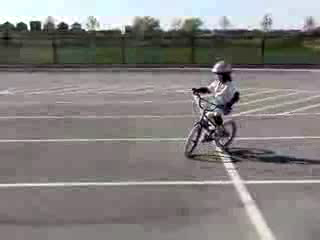

In [9]:
frames = list(extract_frames("/content/UCF-101/Biking/v_Biking_g01_c01.avi"))
print(np.array(frames[0]).shape)
frames[0]

In [10]:
len(frames),frames[0]

(151, <PIL.Image.Image image mode=RGB size=320x240>)

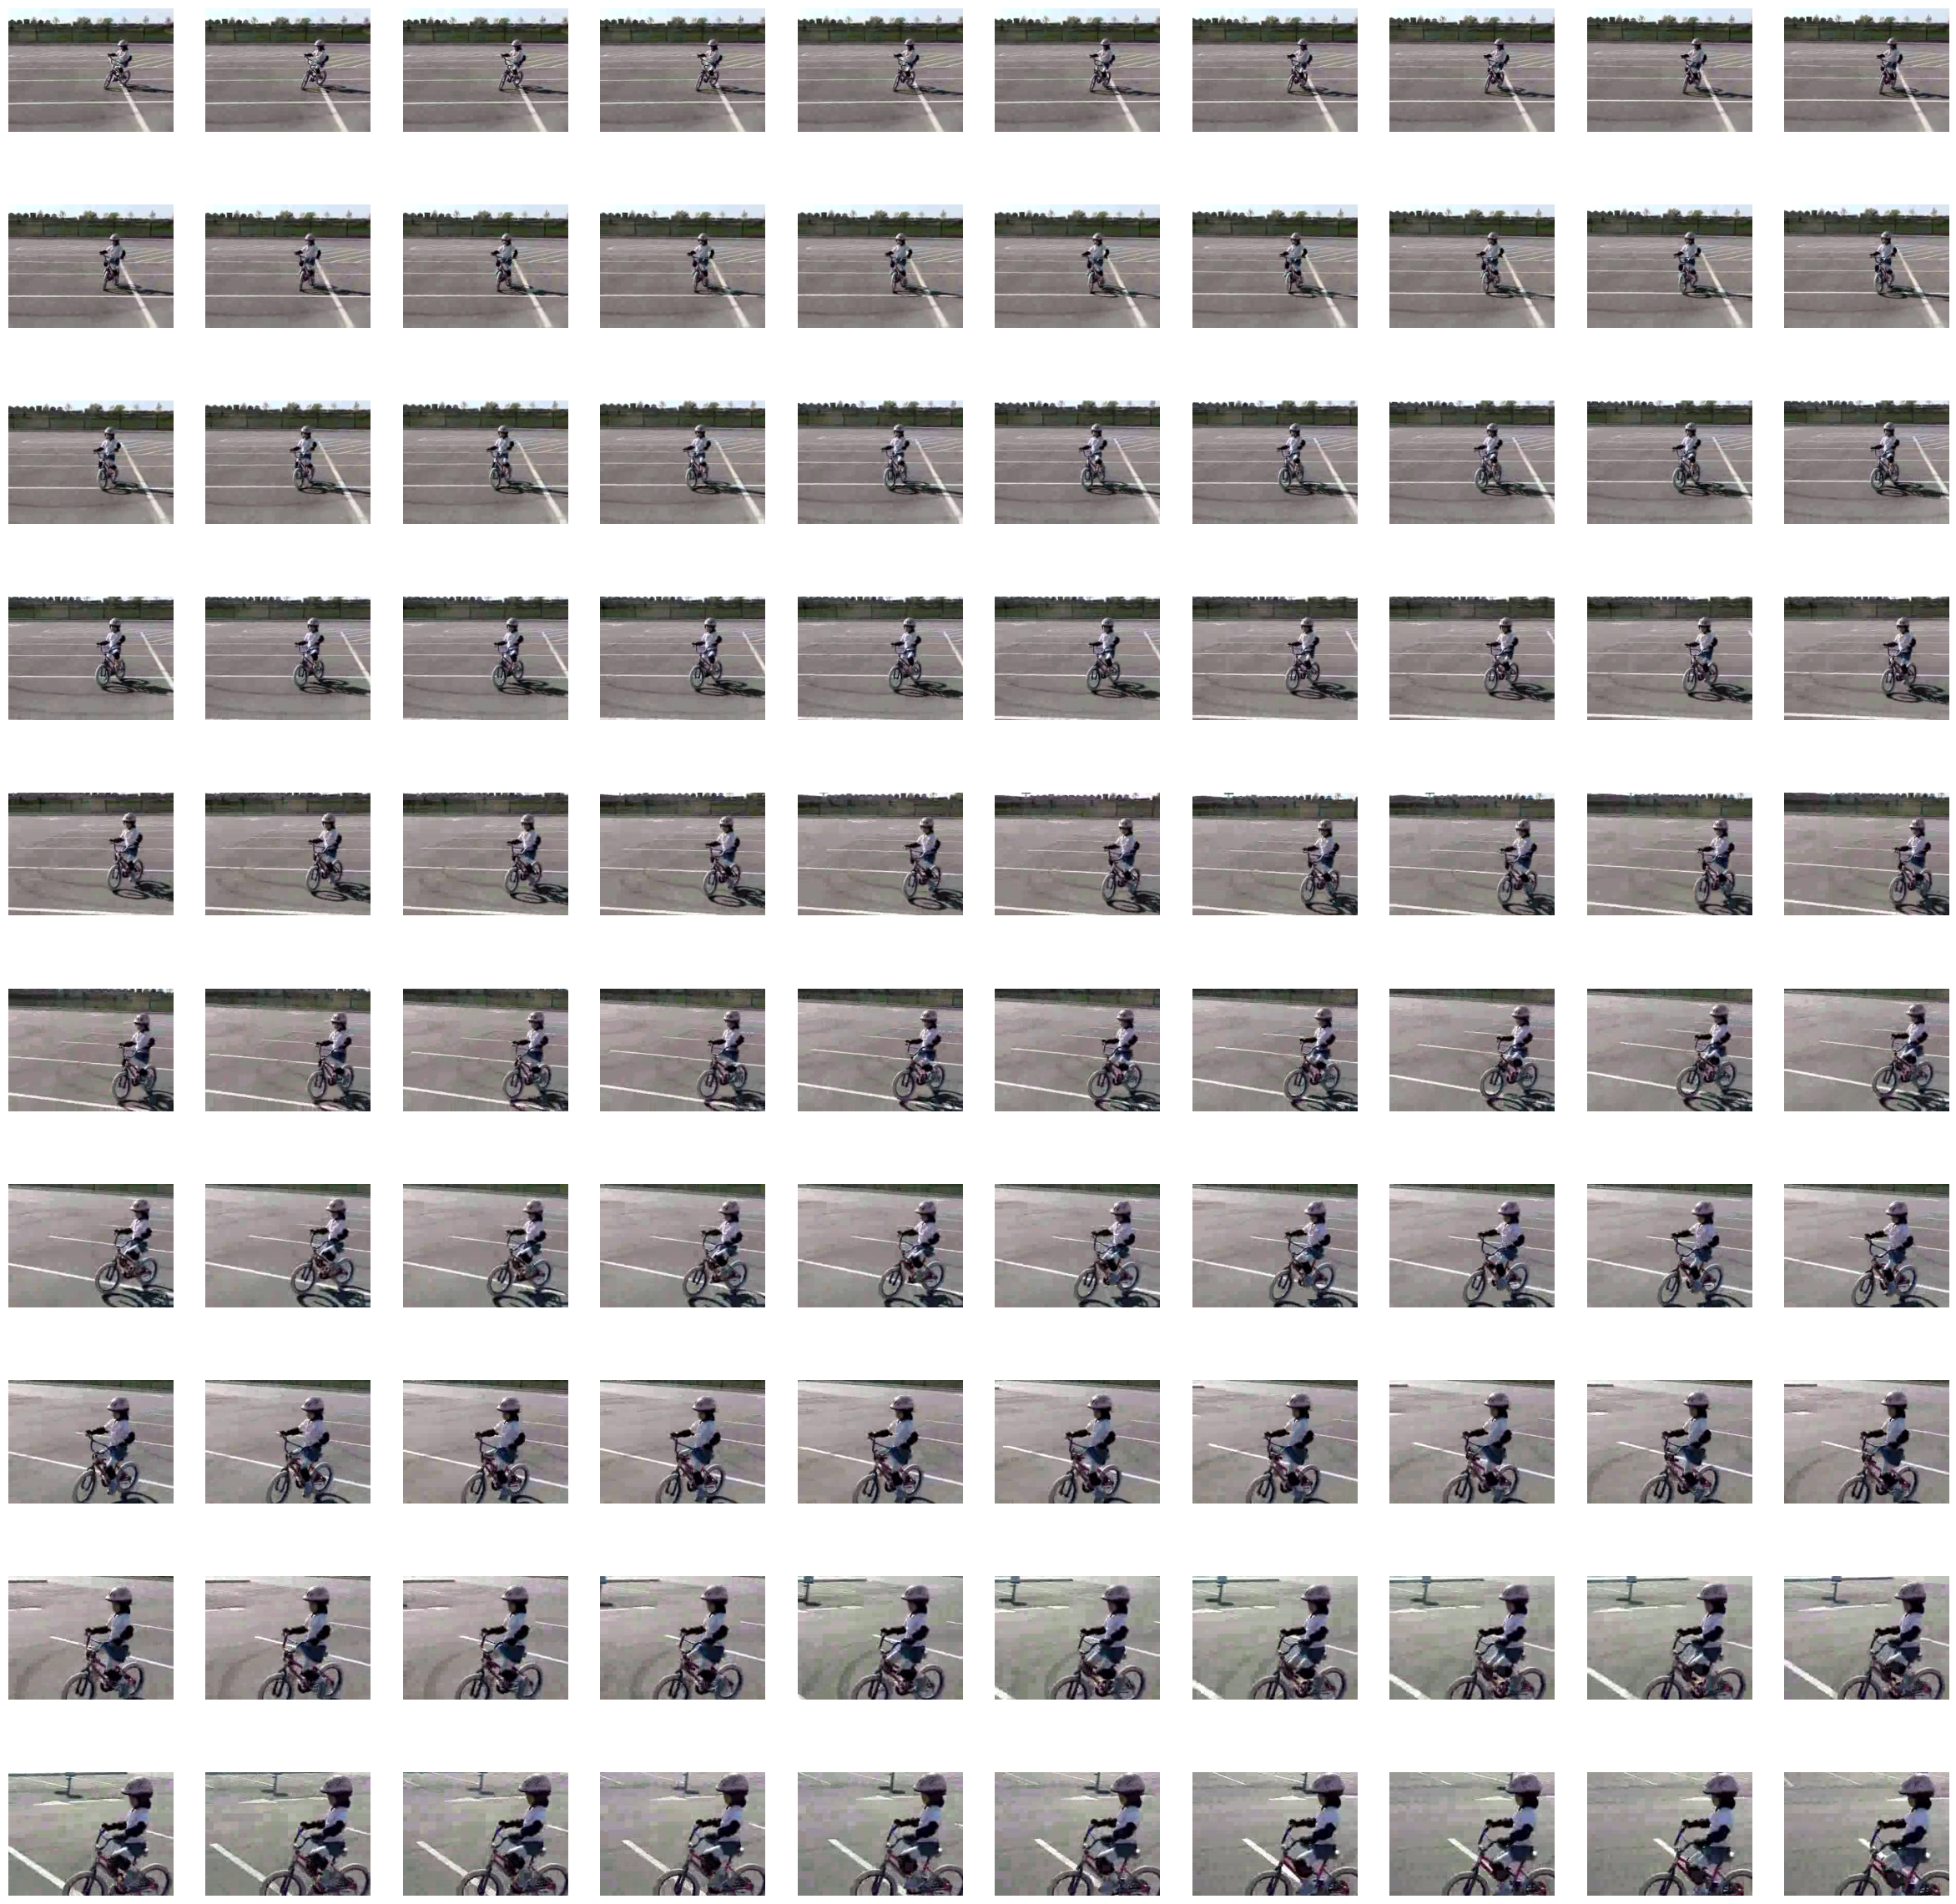

In [11]:
#from fastai.vision.core import show_images
show_images(frames,nrows=10, ncols=10)

##ds,dl

In [12]:
instance_paths=glob.glob("/content/UCF-101/*/*",recursive=False)

In [13]:
instance_paths

['/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g10_c05.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g02_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g11_c04.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g07_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g10_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g19_c02.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g22_c06.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g21_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g12_c03.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g13_c03.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g10_c02.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g20_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g01_c06.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g12_c05.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g16_c01.avi',
 '/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g08_c02.avi',
 '/content/UCF-101/Frisb

In [14]:
class ImageTuple(fastuple):
    "A tuple of PILImages"
    def show(self, ctx=None, **kwargs): 
        n = len(self)
        img0, img1, img2= self[0], self[n//2], self[n-1]
        if not isinstance(img1, Tensor):
            t0, t1,t2 = tensor(img0), tensor(img1),tensor(img2)
            t0, t1,t2 = t0.permute(2,0,1), t1.permute(2,0,1),t2.permute(2,0,1)
        else: t0, t1,t2 = img0, img1,img2
        return show_image(torch.cat([t0,t1,t2], dim=2), ctx=ctx, **kwargs)

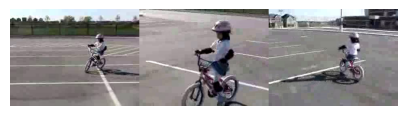

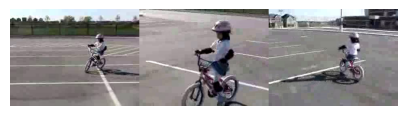

In [15]:
img_sample=ImageTuple(PILImage.create(fn) for fn in frames).show()
img_sample.figure

In [16]:
class ImageTupleTfm(Transform):
    def __init__(self, seq_len=20):
        store_attr()
    def encodes(self, path):
        frames = list(extract_frames(path))
        n_frames =len(frames)
        s = slice(0, min(self.seq_len, n_frames))
        return ImageTuple(tuple(PILImage.create(f) for f in frames[s]))

In [17]:
tfm = ImageTupleTfm(seq_len=5)
biking_instance = instance_paths[0]
biking_instance

'/content/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g10_c05.avi'

<Axes: >

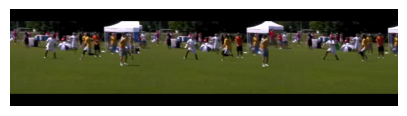

In [18]:
tfm(biking_instance).show()

In [19]:
splits = RandomSplitter()(instance_paths)
ds = Datasets(instance_paths, tfms=[[ImageTupleTfm(5)], [parent_label, Categorize]], splits=splits)

In [20]:
len(ds)

13320

In [21]:
ds.tfms

(#2) [Pipeline: ImageTupleTfm,Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}]

In [22]:
dls = ds.dataloaders(bs=24, after_item=[Resize(128), ToTensor], 
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

In [23]:
x,y = dls.one_batch()

In [24]:
x

(TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
                [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
                [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
                ...,
                [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
                [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
                [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
               [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
                [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
                [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
                ...,
                [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
                [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
                [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
               [

In [25]:
y

TensorCategory([ 30,  68,  94,  68,  70,   6,  99,  92,  60,  96,  39,  62,  87,
                 27,  44,  91,   4,  26,  97,  49,   1,  21,  32, 100],
               device='cuda:0')

In [26]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()

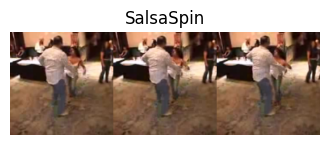

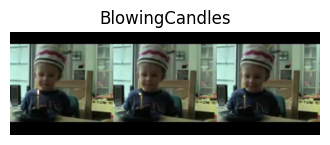

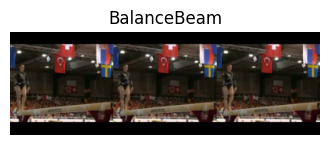

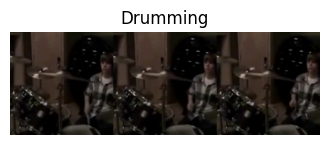

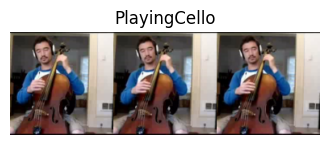

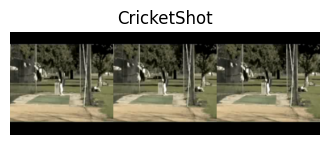

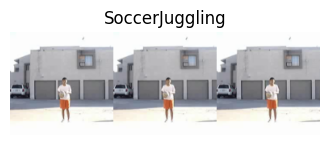

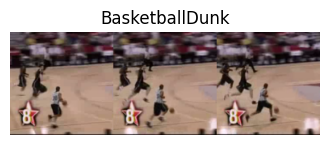

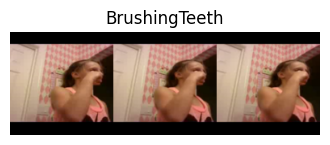

In [27]:
dls.show_batch()

#model

##simple model

In [28]:
class SimpleModel(Module):
    def __init__(self, arch=resnet34(), n_out=101):
        self.encoder = TimeDistributed(create_body(arch, pretrained=True))
        self.head = TimeDistributed(create_head(512, 101))
    def forward(self, x):
        x = torch.stack(x, dim=1)
        return self.head(self.encoder(x)).mean(dim=1)
def simple_splitter(model): return [params(model.encoder), params(model.head)]

In [29]:
simple_model = SimpleModel().cuda()

In [30]:
learn = Learner(dls, simple_model, metrics=[accuracy], splitter=simple_splitter).to_fp16()

In [31]:
learn.fine_tune(3,1e-3, freeze_epochs=2)

KeyboardInterrupt: ignored

In [ ]:
learn.show_results()

##resnet RNN

In [32]:
arch2 = resnet34()
encoder = nn.Sequential(create_body(arch2, pretrained=True), nn.AdaptiveAvgPool2d(1), Flatten()).cuda()

In [33]:
encoder(x[0]).shape

torch.Size([24, 512])

In [34]:
tencoder = TimeDistributed(encoder)
tencoder(torch.stack(x, dim=1)).shape

torch.Size([24, 5, 512])

In [35]:
class RNNModel(Module):
    def __init__(self, arch=resnet34, n_out=101, num_rnn_layers=1):
        self.encoder = TimeDistributed(nn.Sequential(create_body(arch, pretrained=True), nn.AdaptiveAvgPool2d(1), Flatten()))
        self.rnn = nn.LSTM(512, 512, num_layers=num_rnn_layers, batch_first=True)
        self.head = LinBnDrop(num_rnn_layers*512, n_out)
    def forward(self, x):
        x = torch.stack(x, dim=1)
        x = self.encoder(x)
        bs = x.shape[0]
        _, (h, _) = self.rnn(x)
        return self.head(h.view(bs,-1))

In [36]:
def rnnmodel_splitter(model):
    return [params(model.encoder), params(model.rnn)+params(model.head)]

In [39]:
RES_rnn = RNNModel().cuda()

AttributeError: ignored

In [ ]:
learn2 = Learner(dls,RES_rnn, metrics=[accuracy], splitter=rnnmodel_splitter()).to_fp16()

In [ ]:
learn2.fine_tune(5, 5e-3)

In [ ]:
learn2.show_results()

#time transformers

In [40]:
!pip install -Uq timesformer-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.1 MB/s eta 0:00:00


In [41]:
from timesformer_pytorch import TimeSformer
class MyTimeSformer(TimeSformer):
    def forward(self, x):
        x = torch.stack(x, dim=1)
        return super().forward(x)

In [42]:
timesformer = MyTimeSformer(
    dim = 128,
    image_size = 128,
    patch_size = 16,
    num_frames = 5,
    num_classes = 101,
    depth = 12,
    heads = 8,
    dim_head =  64,
    attn_dropout = 0.1,
    ff_dropout = 0.1
).cuda()

In [43]:
learn_tf= Learner(dls, timesformer, metrics=[accuracy]).to_fp16()

In [44]:
learn_tf.fit_one_cycle(12, 5e-4)

KeyboardInterrupt: ignored

In [ ]:
learn_tf.show_results()